# Workflow for processing  Heron Island - 19JUN18 - Sentinel 2a

In [1]:
import time, sys, os, shutil
start_time = time.time()

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

sys.path.append("..")
from CalVal import *

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300


field_data = ['HER', '19JUN18', '', 'Sentinel2a', '', '', '']
indir='/g/data/u46/users/aw3463/GuyByrne/30APR18/Heron/19JUN18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/HER-MultiTimeLine/'
fignum=1

directory = os.path.dirname(output)
if os.path.exists(directory):
    shutil.rmtree(directory)
os.makedirs(directory)

ls8_bad_days = ['2013-04-25', '2013-05-27', '2013-06-12', '2013-06-28', '2013-07-14',
                '2013-08-15', '2013-08-24', '2013-08-31', '2013-10-27', '2013-11-03', 
                '2013-11-12', '2013-11-28', '2013-12-05', '2013-12-14', '2013-12-21', '2014-01-06', 
                '2014-01-15', '2014-01-22', '2014-02-07', '2014-02-16', '2014-02-23', '2014-03-11', 
                '2014-03-20', '2014-03-27', '2014-04-12', '2014-04-28', '2014-05-07', '2014-05-14', 
                '2014-05-30', '2014-06-08', '2014-06-15', '2014-07-01', '2014-07-26', '2014-08-11', 
                '2014-08-27', '2014-10-05', '2014-11-06', '2014-11-22', '2014-12-01', '2014-12-17', 
                '2014-12-24', '2015-01-02', '2015-01-09', '2015-01-25', '2015-02-03', '2015-02-19', 
                '2015-02-26', '2015-03-14', '2015-03-30', '2015-04-15', '2015-05-01', '2015-06-11', 
                '2015-06-27', '2015-07-04', '2015-07-20', '2015-07-29', '2015-08-21', '2015-09-06', 
                '2015-10-01', '2015-10-17', '2015-10-24', '2015-11-02', '2015-11-09', '2015-11-25', 
                '2015-12-11', '2015-12-20', '2015-12-27', '2016-01-05', '2016-01-12', '2016-02-06', 
                '2016-02-13', '2016-02-22', '2016-02-29', '2016-03-09', '2016-03-16', '2016-03-25', 
                '2016-04-10', '2016-04-17', '2016-04-26', '2016-05-03', '2016-05-19', '2016-06-13', 
                '2016-06-20', '2016-06-29', '2016-07-15', '2016-07-31', '2016-08-07', '2016-08-16', 
                '2016-08-23', '2016-09-08', '2016-09-17', '2016-09-24', '2016-10-03', '2016-10-10', 
                '2016-10-26', '2016-11-11', '2016-11-20', '2016-11-27', '2016-12-13', '2016-12-22', 
                '2016-12-29', '2017-01-14', '2017-01-30', '2017-02-08', '2017-02-24', '2017-03-03', 
                '2017-03-19', '2017-03-28', '2017-04-04', '2017-04-29', '2017-05-06', '2017-05-22', 
                '2017-05-31', '2017-07-02', '2017-07-18', '2017-07-25', '2017-08-03', '2017-08-26', 
                '2017-09-27', '2017-10-13', '2017-10-22', '2017-10-29', '2017-11-07', '2017-11-14', 
                '2017-11-23', '2017-11-30', '2017-12-09', '2017-12-16', '2018-01-01', '2018-01-17', 
                '2018-01-26', '2018-02-02', '2018-02-27', '2018-03-06', '2018-03-15', '2018-03-22', 
                '2018-03-31', '2018-04-07', '2018-04-23', '2018-05-02', '2018-05-09', '2018-05-18', 
                '2018-05-25', '2018-06-03', '2018-06-10', '2018-06-26', '2018-08-06', '2018-08-29', 
                '2018-09-07', '2018-09-23', '2018-10-16', '2018-11-01', '2018-11-10', '2018-11-17',
                '2018-12-03', '2018-12-12', '2018-12-19', '2018-12-28', '2019-01-04', '2019-01-13',
                '2019-01-20', '2019-01-29']
s2a_bad_days = ['2015-10-23', '2015-11-12', '2016-01-11', '2016-02-10', '2016-02-20', '2016-03-21',
                '2016-04-10', '2016-04-30', '2016-05-10', '2016-05-20', '2016-06-19', '2016-07-29',
                '2016-08-08', '2016-09-07', '2016-11-16', '2016-11-26', '2016-12-06', '2016-12-26',
                '2017-01-05', '2017-01-15', '2017-02-04', '2017-02-24', '2017-03-06', '2017-03-16',
                '2017-03-26', '2017-04-05', '2017-04-15', '2017-04-25', '2017-05-05', '2017-05-15',
                '2017-06-04', '2017-06-14', '2017-07-04', '2017-07-14', '2017-10-02', '2017-10-22',
                '2017-11-01', '2017-11-21', '2017-12-01', '2017-12-11', '2018-01-10', '2018-01-20',
                '2018-01-30', '2018-02-09', '2018-03-11', '2018-03-21', '2018-03-31', '2018-04-10',
                '2018-04-20', '2018-05-10', '2018-05-20', '2018-05-30', '2018-06-09', '2018-06-29',
                '2018-09-17', '2018-10-17', '2018-11-16', '2018-12-06', '2018-12-16', '2018-12-26']
s2b_bad_days = ['2017-07-09', '2017-07-19', '2017-09-17', '2017-10-17', '2017-11-06', '2017-12-06',
                '2017-12-16', '2018-01-05', '2018-01-15', '2018-01-25', '2018-02-04', '2018-02-24',
                '2018-03-16', '2018-03-26', '2018-04-05', '2018-04-25', '2018-05-05', '2018-05-25',
                '2018-06-04', '2018-06-14', '2018-09-22', '2018-10-02', '2018-10-12', '2018-12-11']
ls8_csvs = ['HER_19JUN18__Landsat8.csv']
sent_csvs = ['HER_19JUN18__Sentinel2.csv']
rain_dat = '../Weather/IDCJAC0009_039326_1800_Data.csv'

brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 1.0, 0.0, 0.0],
                          ['band11', 1.0, 0.0, 0.0],
                          ['band12', 1.0, 0.0, 0.0],
                          ['band2', 1.0, 0.0, 0.0],
                          ['band3', 1.0, 0.0, 0.0],
                          ['band4', 1.0, 0.0, 0.0],
                          ['band5', 1.0, 0.0, 0.0],
                          ['band6', 1.0, 0.0, 0.0],
                          ['band7', 1.0, 0.0, 0.0],
                          ['band8', 1.0, 0.0, 0.0],
                          ['band8a', 1.0, 0.0, 0.0],
                         ])
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})

f_name = sat_resp[field_data[3]]

## IMPORTANT NOTE
Original csv file has three spreadsheets with incorrect labels. 
The following is the mapping from original labels to the currently used labels in this workflow.<P>

<TABLE>
<TR>

<TD>Original Label</TD><TD>Device ID</TD><TD>Device Description</TD><TD>Name Used in this Workflow</TD></TR>
<TR><TD>ed</TD><TD>8494</TD><TD>Scalar Irradiance - spherical</TD><TD>Lu</TD></TR>
<TR><TD>ed Total</TD><TD>8035</TD><TD>Irradiance - cosine</TD><TD>Ed</TD></TR>
<TR><TD>lu</TD><TD>81f7</TD><TD>Radiance - 7$^\circ$ FOV</TD><TD>Lsky</TD></TR>
</TABLE>



### Read in Lu, set Wavelength to be index and drop bad spectra

In [2]:
Lu = pd.read_csv(indir+'HP1.csv')
Lu.set_index('Time', inplace=True)
Lu.index.names = ['Wavelength']
Lu.drop('576.23333', axis=1, inplace=True)
Lu.drop('579.71667', axis=1, inplace=True)

### Plot Lu spectra

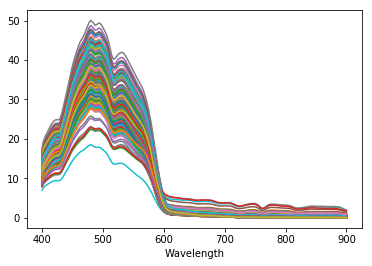

In [3]:
Lu.plot(legend=False)
plt.savefig(output+field_data[0]+'_'+field_data[1]+'_'+field_data[2]+'_'+field_data[3]+'_FIG'+str(fignum)+'_Lu.png')
fignum+=1

### Read in Ed and set Wavelength as index

In [4]:
Ed = pd.read_csv(indir+'HP2.csv')
Ed.set_index('Time', inplace=True)
Ed.index.names = ['Wavelength']

### Plot Ed

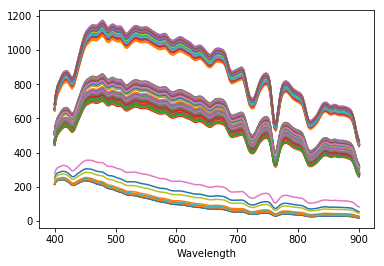

In [5]:
Ed.plot(legend=False)

### Remove any spectra from Ed where the first channel is NOT between 400-600
### Plot the result

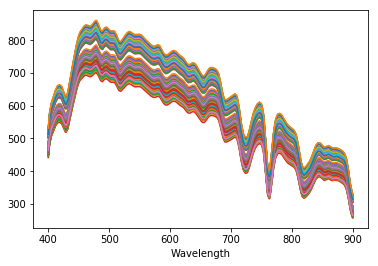

In [6]:
badcols = []

for i in range(len(Ed.iloc[0])):
    if Ed.iloc[0,i]>600 or Ed.iloc[0,i]<400:
        badcols.append(i)
        
Ed.drop(Ed.columns[badcols], axis=1, inplace=True)

Ed.plot(legend=False)
plt.savefig(output+field_data[0]+'_'+field_data[1]+'_'+field_data[2]+'_'+field_data[3]+'_FIG'+str(fignum)+'_Ed.png')
fignum+=1

### Read in Lsky and set index to Wavelength

In [7]:
Lsky = pd.read_csv(indir+'HP3.csv')
Lsky.set_index('Time', inplace=True)
Lsky.index.names = ['Wavelength']

### Remove bad spectra from Lsky (anything where first channel is below 200)
### Plot the result

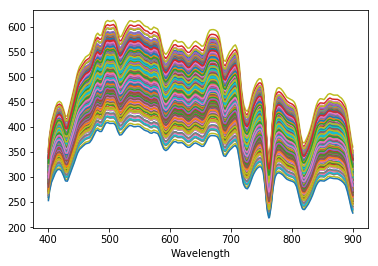

In [8]:
badcols = []

for i in range(len(Lsky.iloc[0])):
    if Lsky.iloc[0,i]<200:
        badcols.append(i)
        
Lsky.drop(Lsky.columns[badcols], axis=1, inplace=True)

Lsky.plot(legend=False)
plt.savefig(output+field_data[0]+'_'+field_data[1]+'_'+field_data[2]+'_'+field_data[3]+'_FIG'+str(fignum)+'_Lsky.png')
fignum+=1

In [9]:
res_Lu = [int(60*x) for x in Lu.columns.values.astype(float)]
res_Ed = [int(60*x) for x in Ed.columns.values.astype(float)]
res_Lsky = [int(60*x) for x in Lsky.columns.values.astype(float)]

In [10]:
Ed.columns = res_Ed
Lsky.columns = res_Lsky
Lu.columns = res_Lu

In [11]:
Edplus = Ed.copy()
Edplus.columns = Ed.columns.values+1
Edminus = Ed.copy()
Edminus.columns = Ed.columns.values-1

Luplus = Lu.copy()
Luplus.columns = Lu.columns.values+1
Luminus = Lu.copy()
Luminus.columns = Lu.columns.values-1

In [12]:
### Use this cell for (Lu - rho*Lsky)/Ed, (with rho=0)

refl_df = pd.DataFrame()
for i in Lsky.columns.values:
    try:
        refl_df = pd.concat([refl_df, ((Lu[i]*np.pi))/Ed[i]], axis=1)
    except KeyError:
        try:
            refl_df = pd.concat([refl_df, ((Luplus[i]*np.pi))/Ed[i]], axis=1)
        except KeyError:
            try:
                refl_df = pd.concat([refl_df, ((Luminus[i]*np.pi))/Ed[i]], axis=1)
            except KeyError:
                continue
            continue
        continue
        
#badcols = []

#for i in range(len(plop.iloc[0])):
#    if plop.iloc[0,i]>0.08:
#        badcols.append(i)
        
#plop.drop(plop.columns[badcols], axis=1, inplace=True)


In [13]:
for i in range(901, 2501):
    refl_df.loc[i] = refl_df.loc[900]
for i in range(350, 399):
    refl_df.loc[i] = refl_df.loc[400]

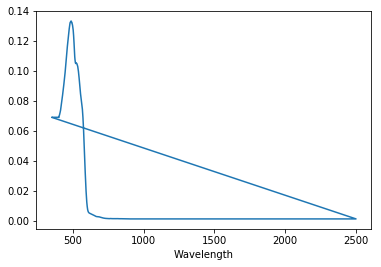

In [14]:
median = refl_df.median(axis=1)
median.plot()

In [15]:
for i in refl_df.columns:
    if int(i)<35133:
        refl_df.drop(i, axis=1, inplace=True)
    

In [16]:
ls_result_df, s2_result_df, ls_band, s2_band = ApplyWeights.apply_weights(f_name, refl_df, sat_resp, field_data)

In [17]:
ls_result_df['Latitude'] = -23.435776 
ls_result_df['Longitude'] = 151.998163
ls_result_df['Line'] = 1
ls_result_df['date_saved'] = datetime(2018, 6, 21, 23, 45, 34)

s2_result_df['Latitude'] = -23.435776 
s2_result_df['Longitude'] = 151.998163
s2_result_df['Line'] = 1
s2_result_df['date_saved'] = datetime(2018, 6, 21, 23, 45, 34)

In [18]:
gps_data = pd.read_csv(indir+'ff2.txt')
gps_data.set_index('time', inplace=True)

for i in range(len(refl_df.columns.values)-1):
    for j in range(len(gps_data.index)):
        if refl_df.columns.values[i] <= gps_data.index[j]:
            ls_result_df['Latitude'][i] = gps_data.latitude.iloc[j]
            ls_result_df['Longitude'][i] = gps_data.longitude.iloc[j]
            s2_result_df['Latitude'][i] = gps_data.latitude.iloc[j]
            s2_result_df['Longitude'][i] = gps_data.longitude.iloc[j]
            break
    if refl_df.columns.values[i] > gps_data.index[-1]:
        ls_result_df['Latitude'][i] = gps_data.latitude.iloc[-1]
        ls_result_df['Longitude'][i] = gps_data.longitude.iloc[-1]
        s2_result_df['Latitude'][i] = gps_data.latitude.iloc[-1]
        s2_result_df['Longitude'][i] = gps_data.longitude.iloc[-1]

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-pack

In [19]:
from CalVal.SolarAngle import solang
ls_result_df['Solar_angle'] = ls_result_df.apply(solang, axis=1)
s2_result_df['Solar_angle'] = s2_result_df.apply(solang, axis=1)

In [20]:
ls_ground_brdf, s2_ground_brdf, hb, br = BRDF.ReadAndCalc(brdf_data, ls_result_df, s2_result_df, field_data)

In [21]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

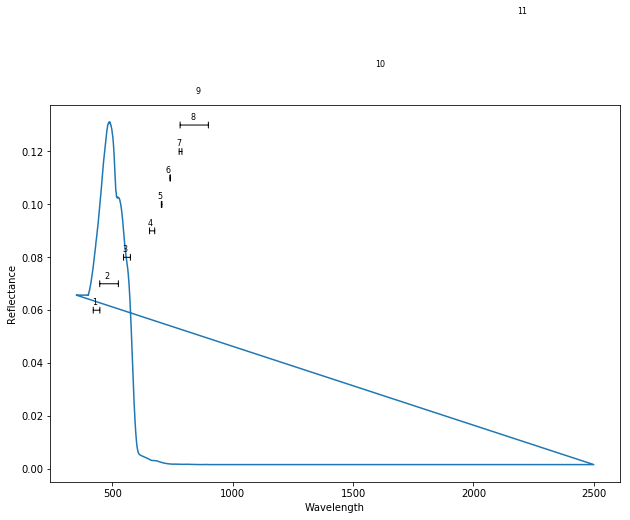

In [22]:
FIG_BandExtents.FIG_band_extents(refl_df, band_min, band_max, output, field_data, fignum)
fignum += 1

In [23]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ls_ground_brdf)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

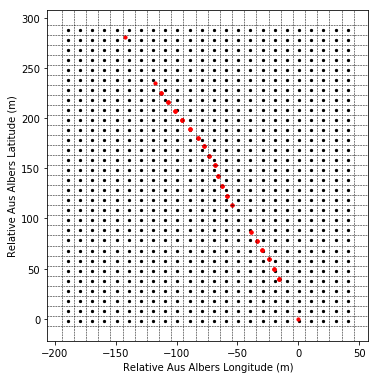

In [24]:
xloc, sxloc = FIG_SatFieldLocations.FIG_sat_field_locations(ls_ground_brdf, s2_ground_brdf, ls8_array, s2a_array, colpac, output, field_data, fignum)
fignum +=1


### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [25]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ls_ground_brdf, s2_ground_brdf, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

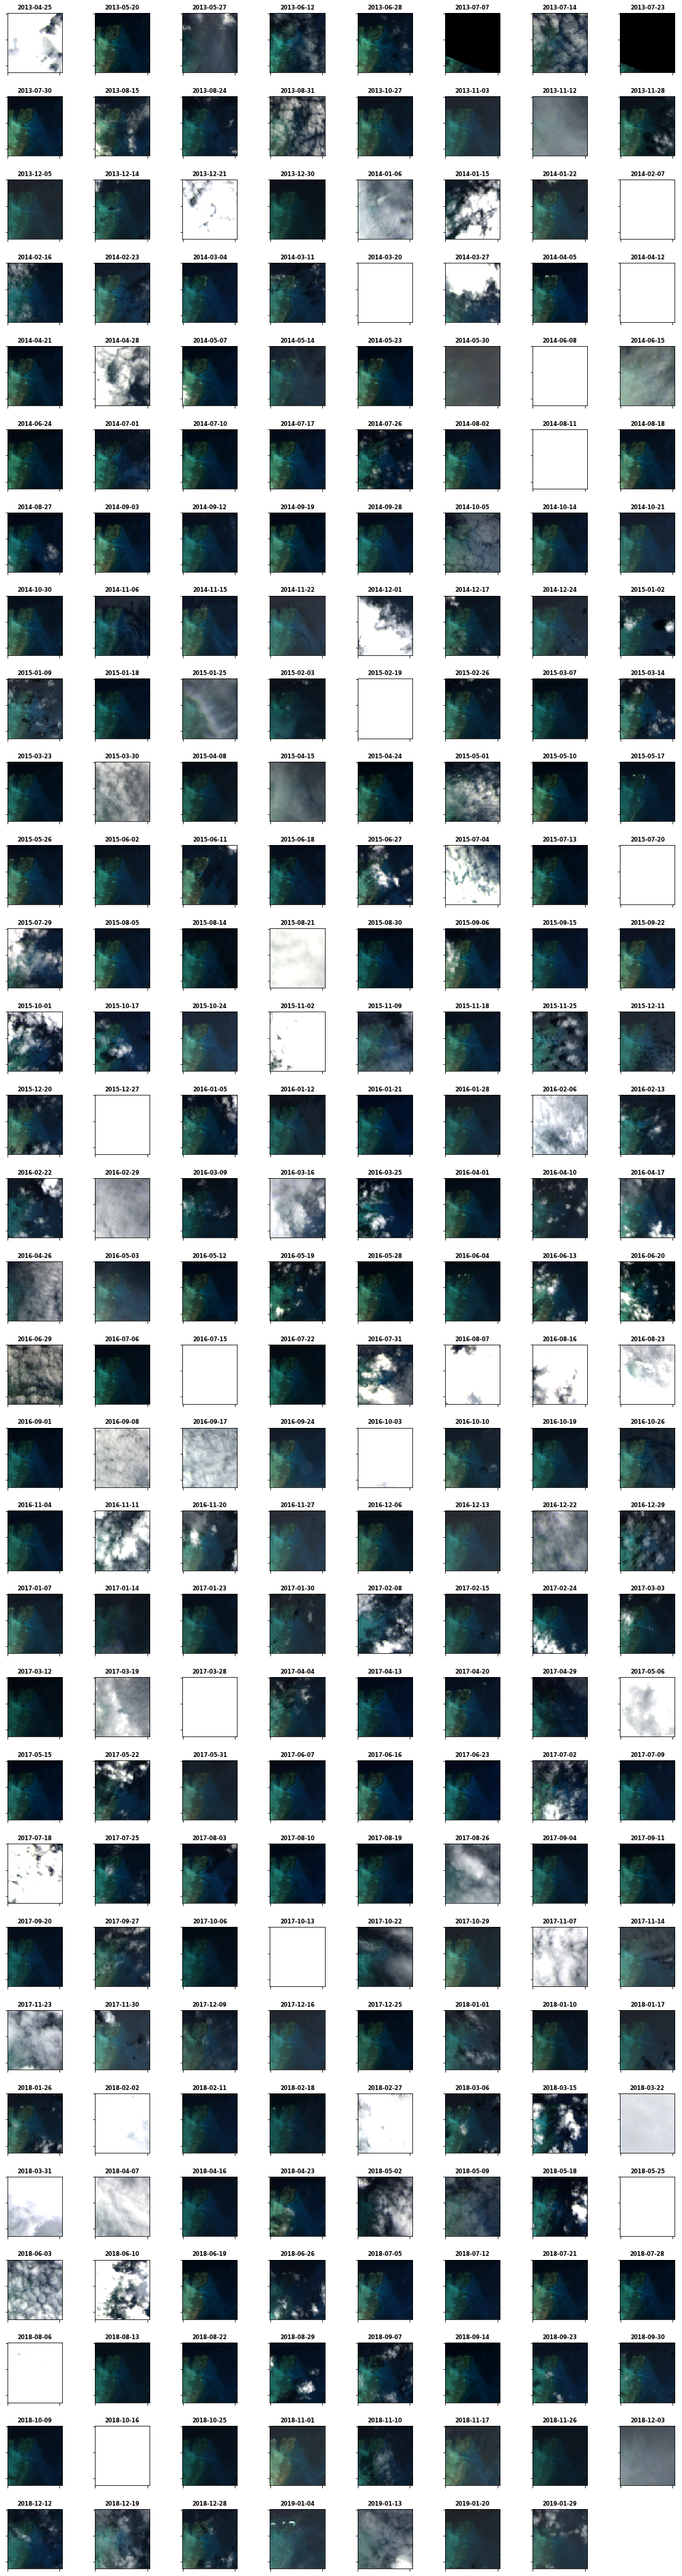

In [26]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

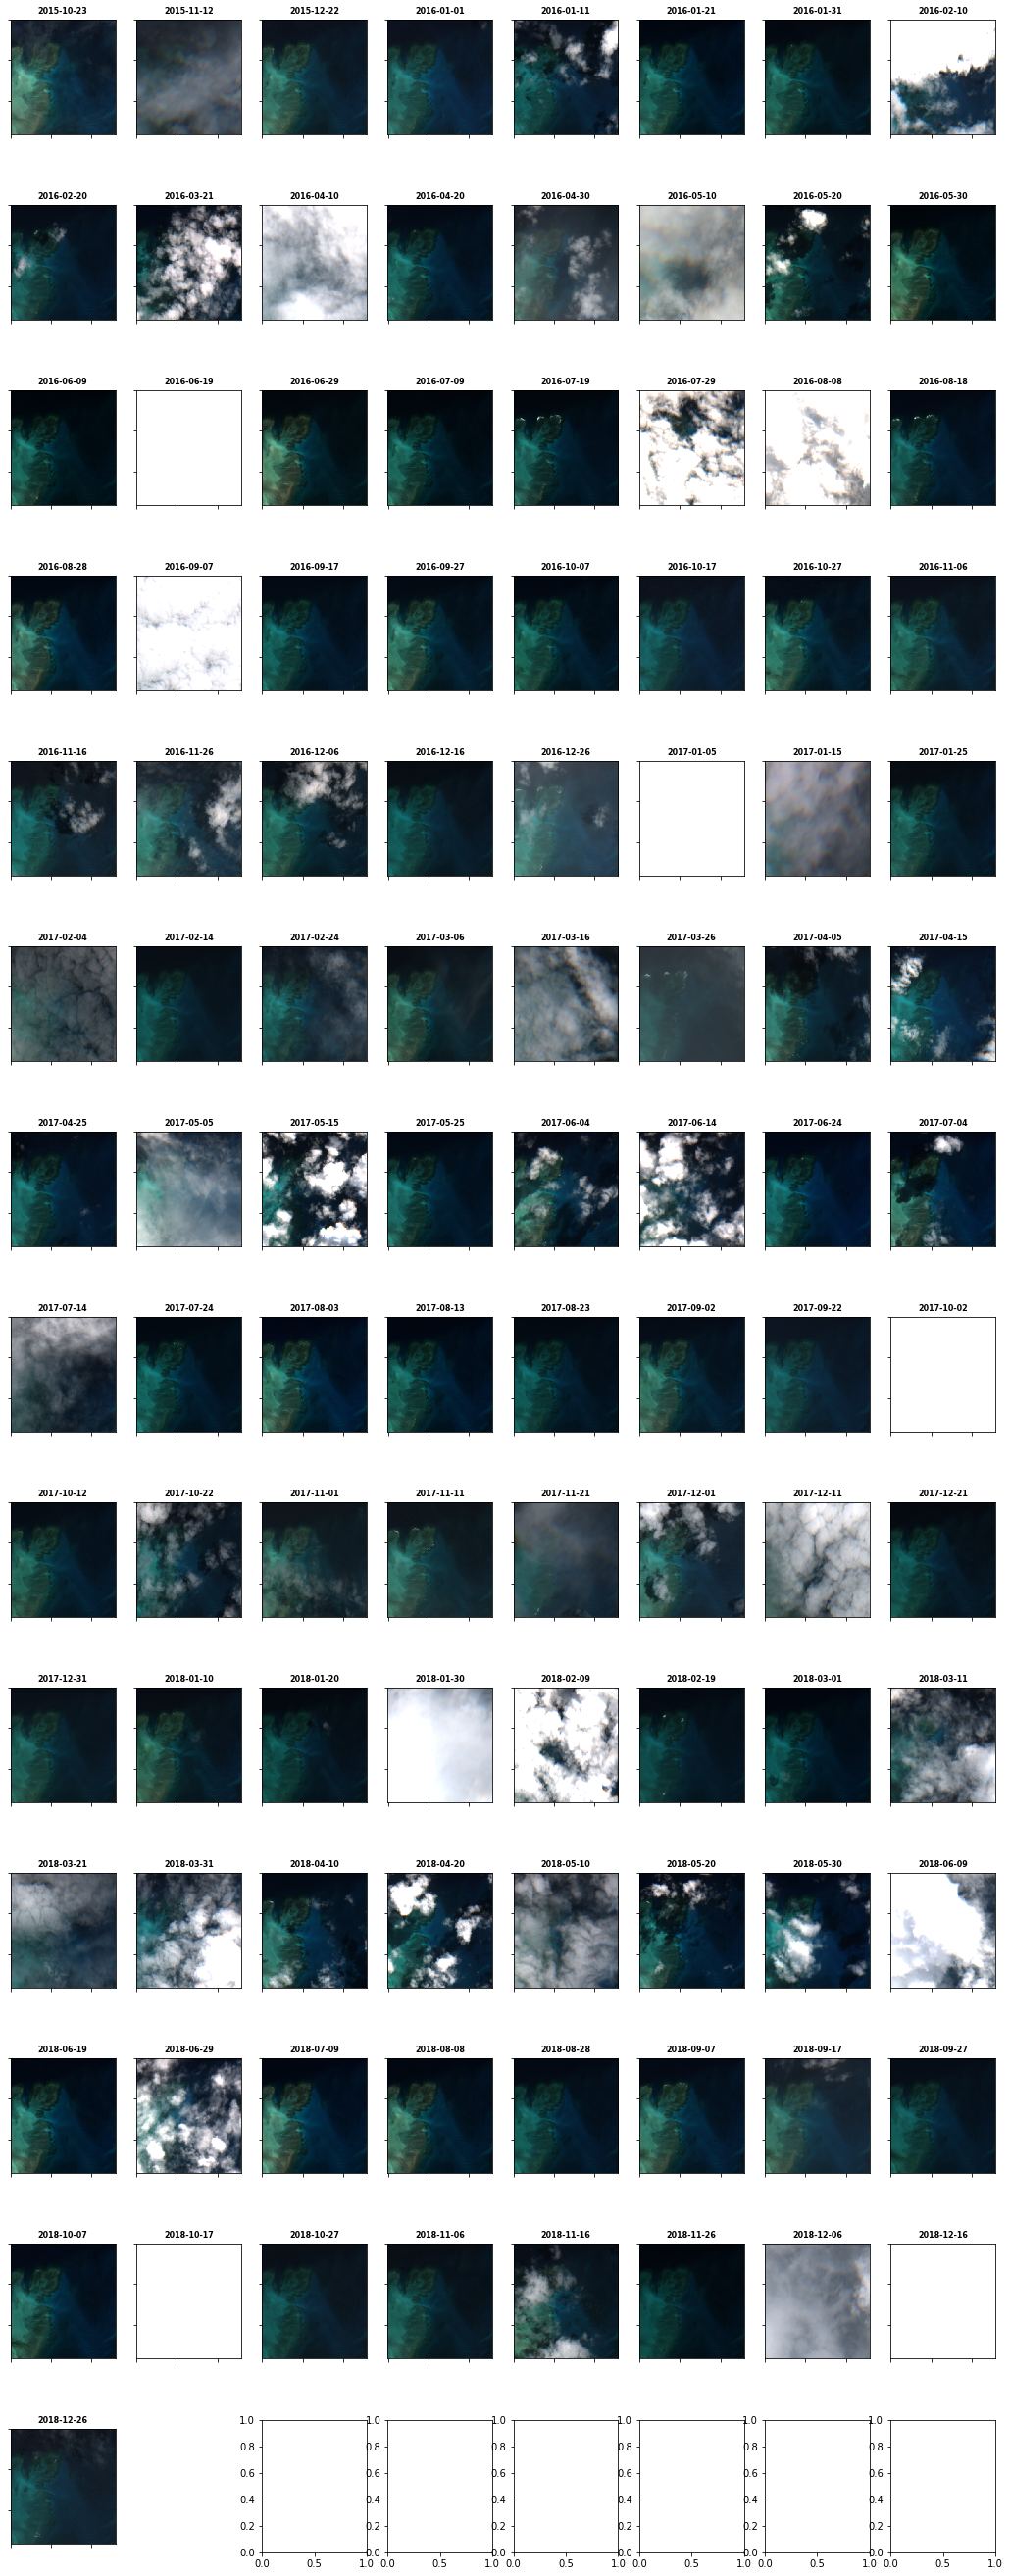

In [27]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

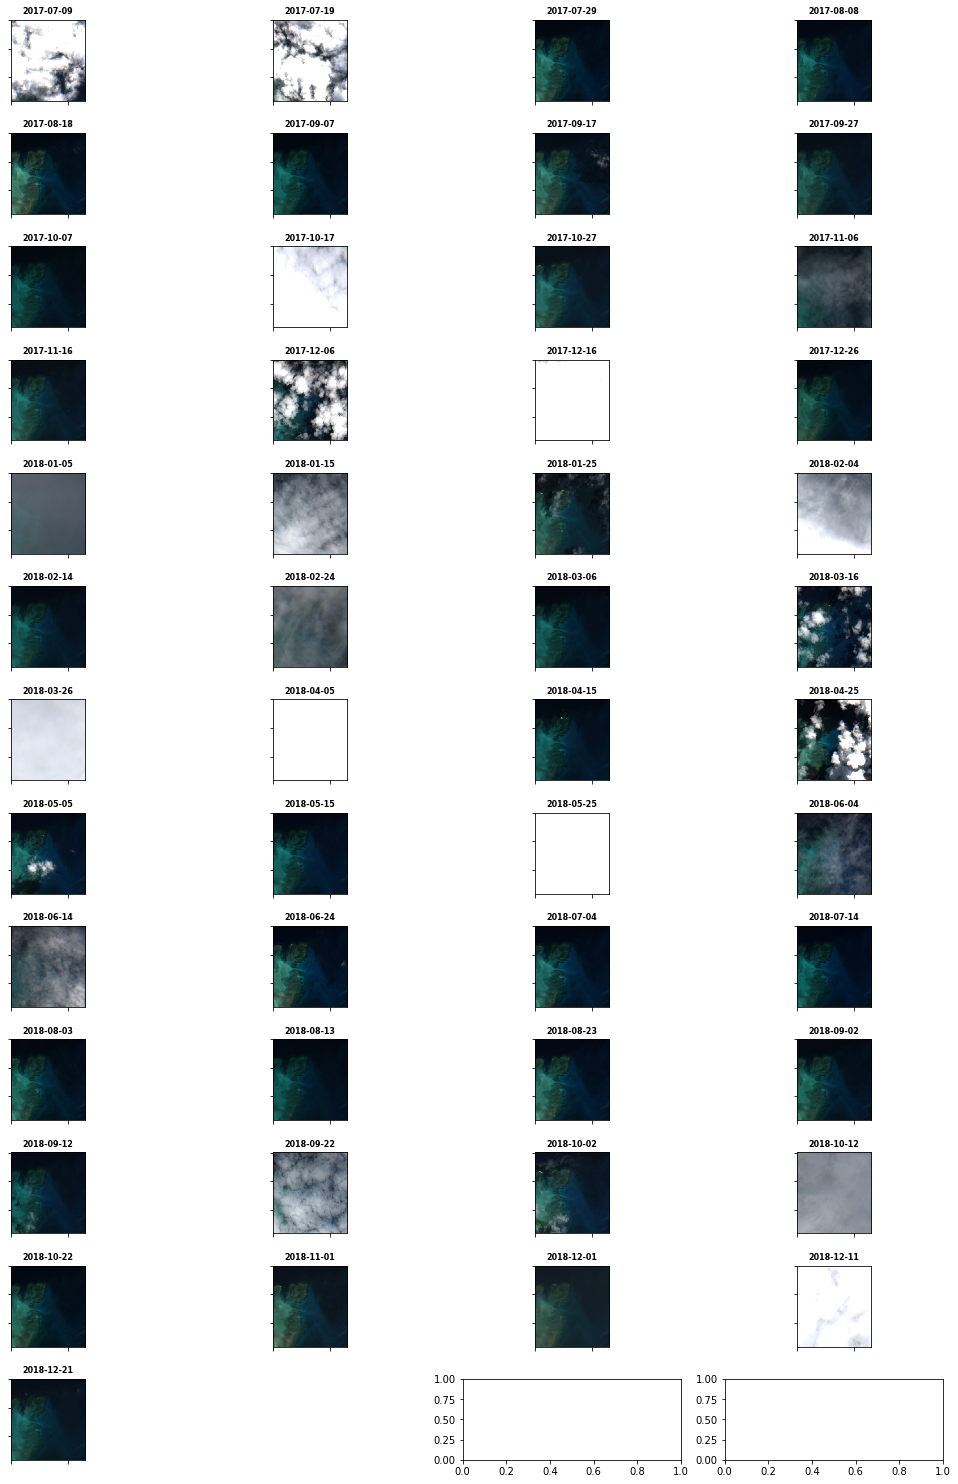

In [28]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

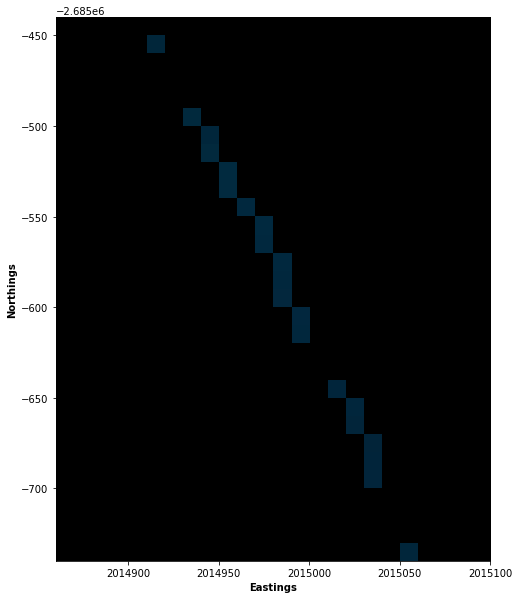

In [29]:
FIG_FieldRGB.FIG_field_RGB(field_array_s2a, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [30]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ls_ground_brdf, s2_ground_brdf, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

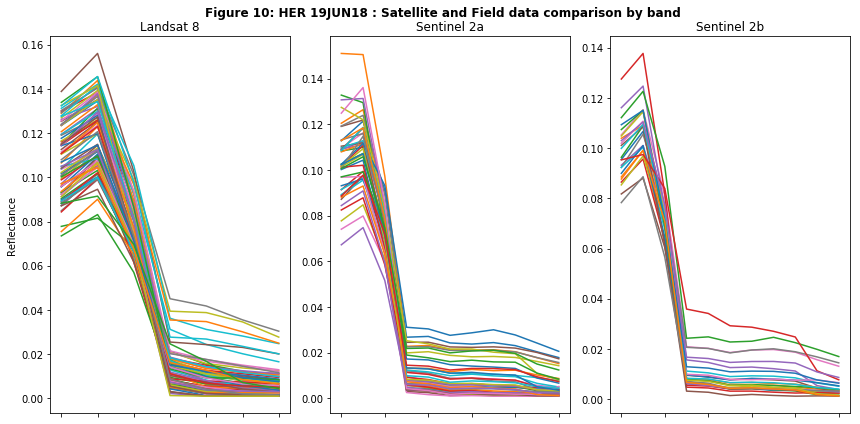

In [31]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

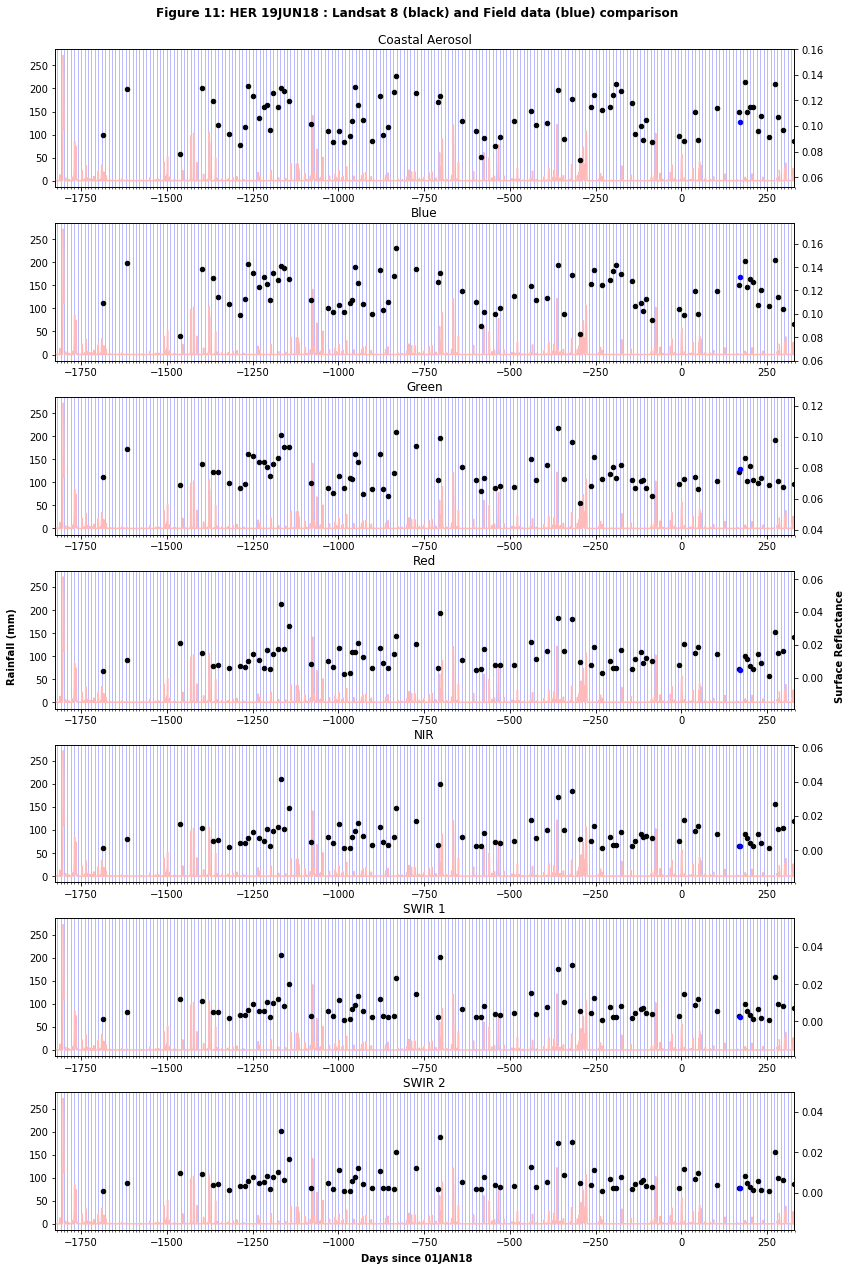

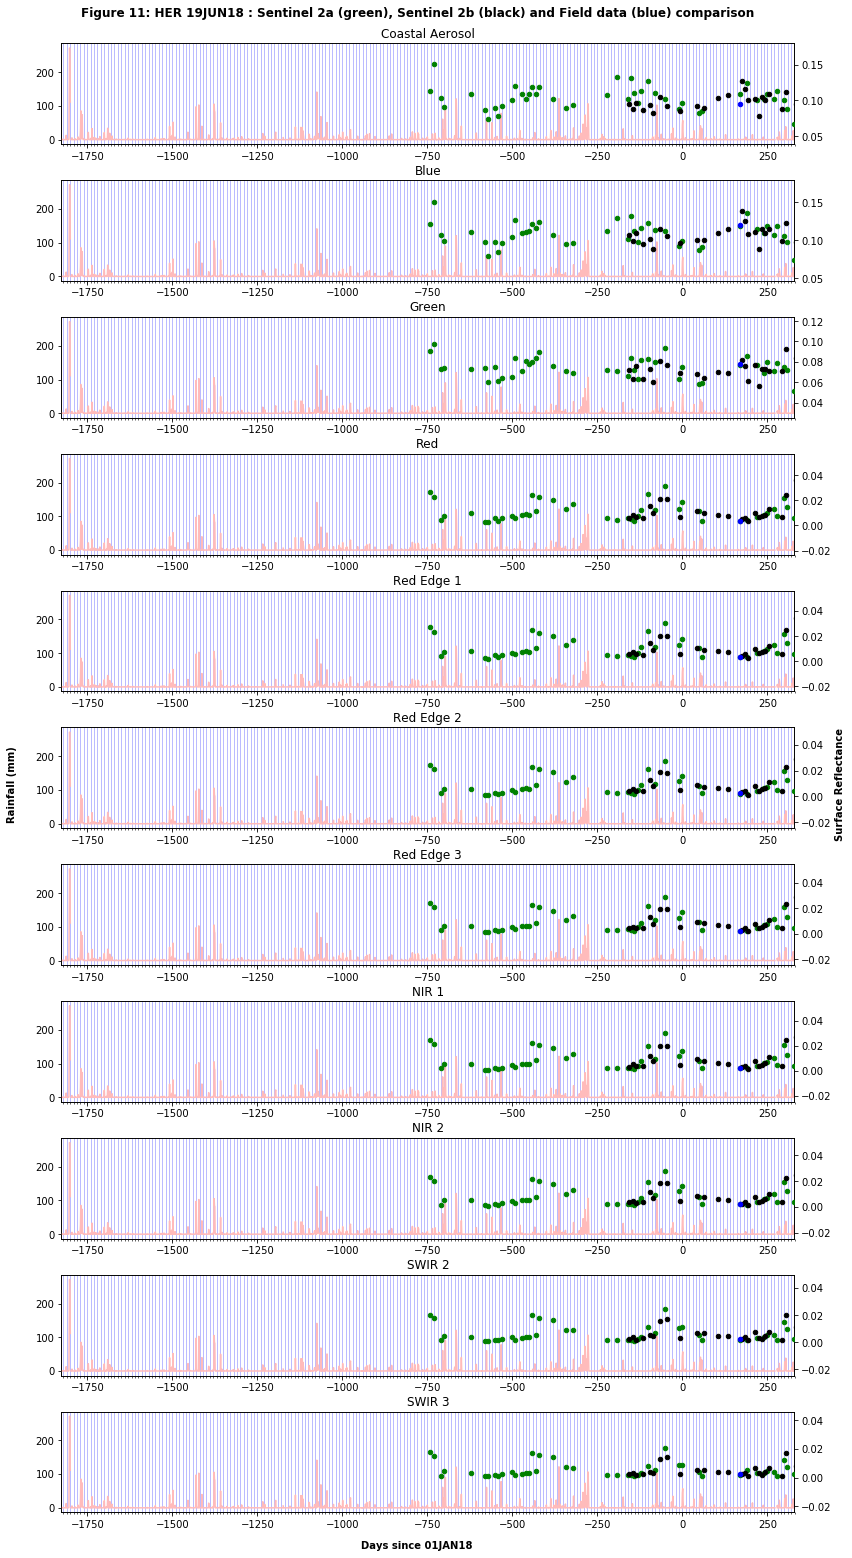

In [32]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [33]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 83
Landsat 8 Surface Reflectance for Band 1 is 0.109+/-0.017 (15.96%)
Landsat 8 Surface Reflectance for Band 2 is 0.121+/-0.017 (14.09%)
Landsat 8 Surface Reflectance for Band 3 is 0.077+/-0.013 (16.5%)
Landsat 8 Surface Reflectance for Band 4 is 0.012+/-0.011 (94.24%)
Landsat 8 Surface Reflectance for Band 5 is 0.008+/-0.011 (129.36%)
Landsat 8 Surface Reflectance for Band 6 is 0.007+/-0.01 (141.46%)
Landsat 8 Surface Reflectance for Band 7 is 0.006+/-0.009 (140.95%)

SENTINEL 2a: Number of adjacent overpasses: 45
Sentinel 2a Surface Reflectance for Band 1 is 0.102+/-0.016 (15.47%)
Sentinel 2a Surface Reflectance for Band 2 is 0.107+/-0.015 (13.71%)
Sentinel 2a Surface Reflectance for Band 3 is 0.073+/-0.01 (13.93%)
Sentinel 2a Surface Reflectance for Band 4 is 0.01+/-0.007 (65.4%)
Sentinel 2a Surface Reflectance for Band 5 is 0.01+/-0.007 (70.61%)
Sentinel 2a Surface Reflectance for Band 6 is 0.008+/-0.007 (82.46%)
Sentinel 2a Surface Reflect

## How long did this notebook take to run?

In [34]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:19:46 (h:m:s) to run
